<a href="https://colab.research.google.com/github/amadords/Projetos-Publicos/blob/master/K_Means_(Algoritmo).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means
---


[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)





Antes de falar sobre o **K-Means**, você sabe o que é **agrupamento de dados**?

**Agrupamento de Dados** é uma técnica de *Machine Learning* que serve para **segmentar** itens que possuem algum tipo de **similaridade**, a exemplo de padrões de cor, forma, tamanho, peso etc.

Os agrupamentos podem ser dos seguintes tipos:
* **Exclusive Cluster** (Cluster exclusivo): Tipo de agrupamento onde os registros são exclusivos para cada grupo, ou seja, se presente em um grupo, não poderá pertencer a nenhum outro.
* **Overlapping Cluster** (Cluster sobreposto): Aqui os registros podem participar de mais de um grupo ou cluster.
* **Hierarchical Cluster** (Cluster hierárquico): Agrupamento onde se possui uma hierarquia entre os grupos e estes grupos podem ter subgrupos contendo outros registros

Por enquanto você só precisa saber disso, agora vamos ao **K-Means**!

![twins](https://image.freepik.com/fotos-gratis/close-up-de-dois-bonito-gemeos-mentindo-frente-laptop-olhar_23-2148039967.jpg)

O **K-Means** (K-Médias) é um algoritmo *não supervisionado*, ou seja, não precisa de interveção humana para que ele trabalhe.
* Objetivo: *Encontrar **similaridades*** entre os dados e *agrupá-los* conforme o número de cluster passado pelo argumento K. Mais à frente será melhor explicado.
* A similaridade entre cada ponto é calculado através de uma *função de distância*, logo pontos mais próximos pertencerão a um mesmo grupo. Isso também será melhor entendido à frente.
* Fases do Algoritmo:
    * **Inicialização**: Geração de forma aleatória ou através de outro método de **K-centroids**, onde o número de centroids é representado por **K**. 
        * Os centroids são os pontos escolhidos inicialmente para serem pontos centrais, ou seja, onde a partir deles, os demais pontos serão calculados em relação à distância. Isso significa que os demais pontos serão classificados em relação a distância dele com os centroids e pertencerão ao *cluster*, ou seja, ao *grupo* em que a diferença entre o ponto e o centroid seja menor. 
            * Exemplo: Se tenho os centroids **1** e **10**, um dado **7** ficará no cluster *10*, pois sua diferença é de apenas *3* em relação a ele, diferente da sua diferença de *6* em relação ao grupo *1*. Ficou claro?
                * Os dados serão atribuidos ao grupo com menor distância como já explicado.
                * Uma das distâncias mais utilizadas, ou a mais utilizada é a distância **Euclidiana** (pode ser provada pela aplicação repetida do teorema de Pitágoras).
                * Ao terminar essa fase, cada dado será pertecente a um grupo.
    * **Atribuição ao Cluster**: Calcula a distância entre todos os pontos de dados e os centroids.
    * **Movimentação dos Centroids**:  *Recalcula* o valor dos centroids através da média dos valores dos pontos de dados. A média será o *novo centroid* daquele cluster.
    * **Otimização do K-Means** (K-Médias): As duas frases anteriores (atribuição e movimentação) serão repetidas até que haja *estabilização*, ou seja, até que não consiga mais alterar ou que algum critério de parada seja atingido.
        * Estático é quando nenhum dos pontos dos dados alteram o cluster.
        * Critério de parada pode ser, por exemplo, o número de iterações.
    
## Sobre os dados utilizados
A base de dados será a base `Iris`, também utilizada por a gente com os algoritmos [Árvore de Decisão](https://bit.ly/2Guqmcd), [KNN](https://bit.ly/34vtr4v) e [SVM](https://bit.ly/3iiWnS4).
  

## Checklist
1. Obtenção e Transformação dos Dados
2. Instanciação do K-Means
3. Estimando o valor de K
4. Validação do Modelo

# 1. Obtenção e Transformação dos Dados

**Importando bibliotecas**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.cluster import KMeans

**Carregando a base de dados iris**

In [ ]:
iris = pd.read_csv("/home/amador/dados/iris2.csv")

In [ ]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Separando os valores de dados e classes**

In [ ]:
# seperando os dados (features ou caracteristicas) dos dados de classe.
X = iris.drop('Species',axis=1)
# visualizando os 10 primeiros registros
X[:10]

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# separando dados (Species é feature da classe ou alvo ou meta)
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

**'Iris-setosa'**, **'Iris-versicolor'**, **'Iris-virginica'** são os clusters, ou grupos que tentaremos encaixa cada amostra de dados.

## Convertendo valores categórios de classe em numéricos

In [ ]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [ ]:
y = y.apply(converte_classe)
y.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

# 2. Instanciação do K-Means
Veja que, como são **3** tipos de **Iris**, usaremos o **n_clusters**, ou seja, **K**=**3**, ou seja, *3 grupos*.

In [ ]:
# com k=3 e inicialização aleatória
kmeans = KMeans(n_clusters = 3, init = 'random')

In [ ]:
# agrupando o algoritmo
kmeans.fit(X)

KMeans(init='random', n_clusters=3)

### Visualizando os centroids
A ordem dos centroids é:

* Centroides do `sepallength`
* Centroids do `sepalwidth`
* Centroids do `petallength`
* Centroids do  `petalwidth`.

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

### Tabela de distância 
Essa tabela mostra a distância dos dados em relação aos centroids.

Veja a primeira amostra:

[5.0595416, 0.14694217, 3.41925061]

A segunda coluna é a do grupo Iris-setosa (0.14), como a amostra é uma Iris-setosa, a distância é *menor que 1* nessa coluna, enquanto as demais são *mais de 5* e *mais de 3*, pois são as outras espécies.


In [ ]:
distance = kmeans.fit_transform(X)
distance

array([[5.0595416 , 0.14694217, 3.41925061],
       [5.11494335, 0.43816892, 3.39857426],
       [5.27935534, 0.41230086, 3.56935666],
       [5.15358977, 0.51883716, 3.42240962],
       [5.10433388, 0.19796969, 3.46726403],
       [4.68148797, 0.68380699, 3.14673162],
       [5.21147652, 0.41520116, 3.51650264],
       [5.00252706, 0.0599333 , 3.33654987],
       [5.32798107, 0.80099438, 3.57233779],
       [5.06790865, 0.36659514, 3.3583767 ],
       [4.89806763, 0.48784424, 3.32449131],
       [4.9966845 , 0.25138019, 3.31126872],
       [5.19103612, 0.49192682, 3.46661272],
       [5.65173594, 0.90906105, 3.90578362],
       [5.10804455, 1.02019214, 3.646649  ],
       [4.88564095, 1.21309192, 3.49427881],
       [5.03090587, 0.66241377, 3.495248  ],
       [5.02342022, 0.1509702 , 3.38444981],
       [4.61792995, 0.82848778, 3.11245944],
       [4.97213426, 0.39898872, 3.37738931],
       [4.6955761 , 0.46172719, 3.07471224],
       [4.9236821 , 0.33762701, 3.31506588],
       [5.

In [ ]:
# distância da primeira amostra como comentado acima
distance[0]

array([5.0595416 , 0.14694217, 3.41925061])

## Não Confunda!!!
Os **centroids** utilizam as features `'sepallength'`, `'sepalwidth'`, `'petallength'` e `'petalwidth'`; por isso há **4 valores**.

A **tabela de distância** nos retorna a distância em relação à classe, por isso são **3 valores** e são os grupos 
`'Iris-setosa'`, `'Iris-versicolor'` e `'Iris-virginica'`. 

### Visualização da amostra 1
Veja a diferença em termo de volume da amostra e sua espécie real (cluster 0) e as demais (1 e 2).

<IPython.core.display.Javascript object>


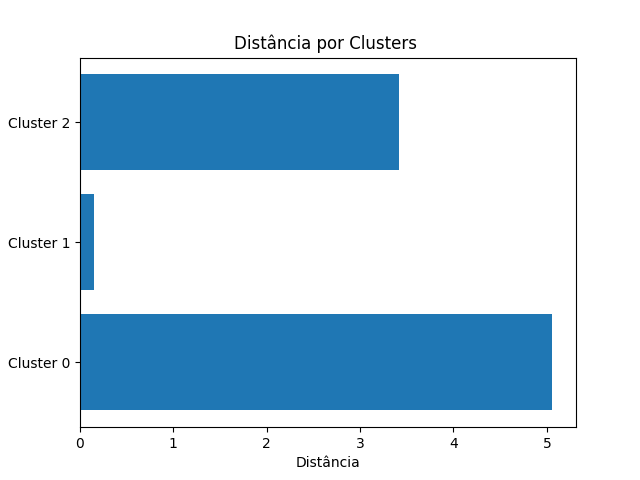

In [ ]:
%matplotlib notebook
x = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(x,distance[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

### Quais sãos as Features?
`'sepallength'`, `'sepalwidth'`, `'petallength'`, `'petalwidth'`.

`'class'` é a classe em si, **'Iris-setosa'**, **'Iris-versicolor'**, **'Iris-virginica'**.

In [ ]:
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

### Visualização dos dados atribuidos aos seus Clusters pelo K-Means
* 0 = 'Iris-virginica'
* 1 = 'Iris-setosa'
* 2 = 'Iris-versicolor'


In [ ]:
labels = kmeans.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

### Visualizando os Centroids

In [ ]:
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

In [ ]:
# centroides do sepallength
kmeans.cluster_centers_[:,0]

array([6.85     , 5.006    , 5.9016129])

In [ ]:
# centroids do sepalwidth
kmeans.cluster_centers_[:,1]

array([3.07368421, 3.418     , 2.7483871 ])

In [ ]:
# centroids do petallength
kmeans.cluster_centers_[:,2]

array([5.74210526, 1.464     , 4.39354839])

In [ ]:
# centroids do petalwidth
kmeans.cluster_centers_[:,3]

array([2.07105263, 0.244     , 1.43387097])

### Visualização gráfica dos dados e os centroids
Os pontos vermelhos são os centroids.
Só foi colocado os centroids do sepalwidth e sepallength, por ser um gráfico bidimensional.

<IPython.core.display.Javascript object>


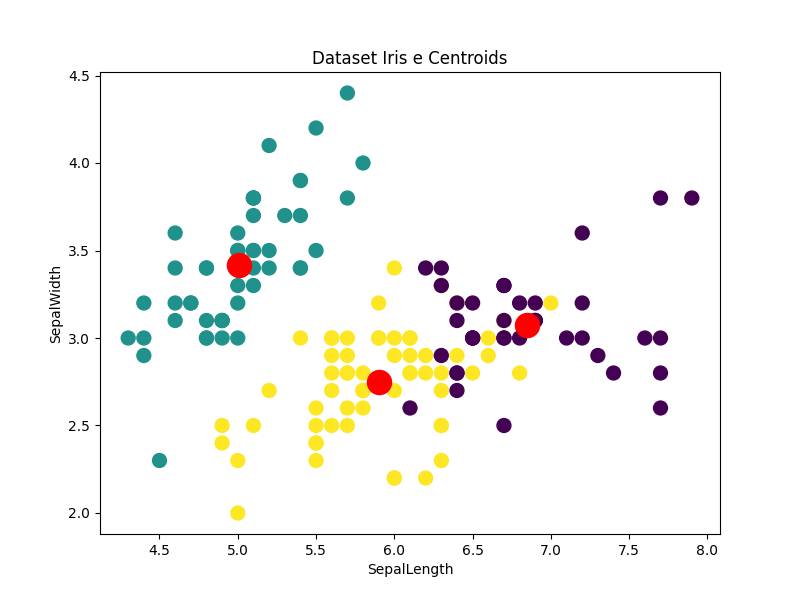

In [ ]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.scatter(X['SepalLength'], X['SepalWidth'], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroids')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

### Agrupando novas amostras

In [ ]:
data = [
        [ 4.12, 3.4, 1.6, 0.7],
        [ 5.2, 5.8, 5.2, 6.7],
        [ 3.1, 3.5, 3.3, 3.0]
    ]
kmeans.predict(data)

array([1, 0, 2], dtype=int32)

Significa que os novos dados foram classificados cada um em um dos grupos:  0 = 'Iris-virginica', 1 = 'Iris-setosa' e 2 = 'Iris-versicolor'.

### Comparativo 
**Entre os dados reais e as classificações**.

Veja como há muito pouco erro.

<IPython.core.display.Javascript object>


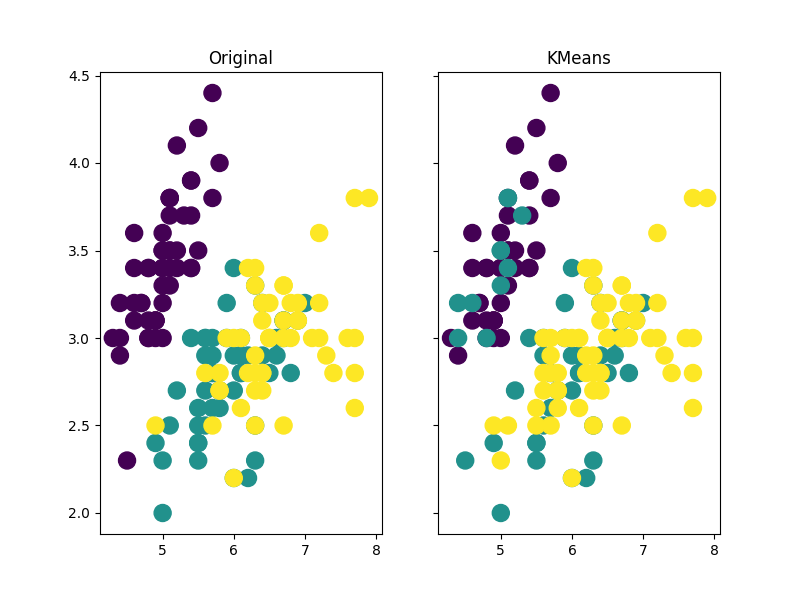

In [ ]:
# visualizando ('validando') resultados do algoritmo
%matplotlib notebook
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
# sharey controla o compartilhamento de propriedades entre os eixos x ( sharex) ou y ( sharey)
# True ou 'all': o eixo x ou y será compartilhado entre todas as subparcelas
ax1.set_title('Original')
ax1.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X['SepalLength'], X['SepalWidth'],s=150,c=sorted(kmeans.labels_));

# 3. Estimando o valor de K
**Com o método *Elbow***.
Em nosso caso é fácil saber quantos grupos, não é? Afinal sabemos que há **3 grupos**, mas aqui é um *caso de estudo*, no mundo real como saber quantos **K** passar para o K-Means?

## ELBOW na  VEIA!!!

*Elbow* é *cotovelo* em inglês e esse *método* consiste em plotar um gráfico em forma de cotovelo onde se "marca a soma dos erros ao quadrado (entre cada ponto e a média de seu agrupamento) como uma função de K e se olha onde o *gŕafico dobra*, ali estará o **valor ideal para o K**.

1 680.8243999999996
2 152.36870647733915
3 78.94084142614601
4 57.34540931571815
5 46.535582051282034
6 38.930963049671746
7 34.20755425729454
8 30.496937562437576
9 28.264640909090904
10 26.796369752583313


<IPython.core.display.Javascript object>


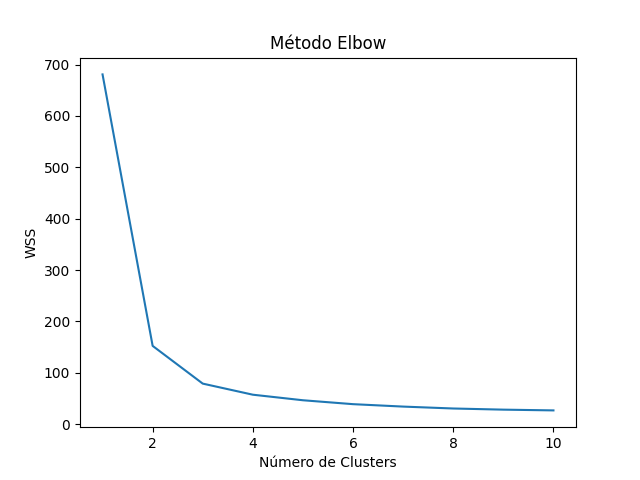

In [ ]:
# Estimando o valor de K - Método Elbow (cotovelo)
# esse método tenta encontar um número de k onde a variância dos dados em relação ao número de clusters não seja tão representativo
%matplotlib notebook
wcss =[]

for i in range(1,11):
    kmeans2=KMeans(n_clusters=i,init='random') # instância o kmeans para cada iteração do range
    kmeans2.fit(X) # agrupando para cada instância
    print(i,kmeans2.inertia_) # imprime o valor corrente inertia com o inertia para fazer o somatório dos erros quadráticos daquele cluster
    wcss.append(kmeans2.inertia_) # adicionando os erros a uma lista
    
    #kmeans com 1 cluster, ou seja somatório de todos, o erro será grande, com 2 já cai bastante, dai em diante
plt.plot(range(1,11),wcss)
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('WSS') # within cluster sum of squares
style.use('ggplot')
plt.show()

# graficamente dá para perceber que do 4 em diante o erro não há muita variação, ou seja, os erros ficam 'estabilizados', logo o parâmetro k ideal é o valor 3

### Deu para entender?
Veja que a partir do **4** o gráfico não tem mais muita variação dos erros, então como o último número que realmente trouxe alteração foi o **3** é o que usaremos. É claro, né?! Afinal é o número de classes que temos aqui nesses dados.

# 4. Validação do Modelo
* com kmeans e não kmeans2, pois este aqui foi criado para o *método elbow*.

### Matriz de Confusão

In [ ]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0        36   0  14   50
1         0  50   0   50
2         2   0  48   50
All      38  50  62  150


### Metricas de classificação

In [ ]:
from sklearn import metrics
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.95      0.72      0.82        50
   Cluster 1       1.00      1.00      1.00        50
   Cluster 0       0.77      0.96      0.86        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



# Obrigado!

Obrigado por ter disponibilizado um pouco do seu tempo e atenção aqui. Espero que, de alguma forma, tenha sido útil para seu crescimento. Se houver qualquer dúvida ou sugestão, não hesite em entrar em contato no [LinkedIn](https://www.linkedin.com/in/daniel-sousa-amador) e verificar meus outros projetos no [GitHub](https://github.com/amadords).

[![LinkedIn](https://img.shields.io/badge/LinkedIn-DanielSousaAmador-purple.svg)](https://www.linkedin.com/in/daniel-sousa-amador)
[![GitHub](https://img.shields.io/badge/GitHub-amadords-darkblue.svg)](https://github.com/amadords)
[![Medium](https://img.shields.io/badge/Medium-DanielSousaAmador-darkorange.svg)](https://medium.com/@daniel.s.amador)



<center><img width="90%" src="https://raw.githubusercontent.com/danielamador12/Portfolio/master/github.png"></center>